Take Home Challenge: Sales Executive Dashboard and Analysis

The objective of this case study is to help give you a better sense of the types of problems that we face on a daily basis. As the preliminary Analytics team within ABC, we are frequently asked to help solve business challenges that generally involve measuring performance and impact to our customers. This specific case study is focused on an analysis for a fictional DVD distribution company. We estimate this case study should take 2-3 days to complete.
Good luck!

Disclaimer: The datasets and scenario provided for this case study are completely fictional. 


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#importing data
data = pd.read_csv("C:/Users/bushi/OneDrive/Bureau/Case Studies/Analytics_Case_Study - Sales_Data.csv", skipinitialspace = True)

#inspecting the first rows of the dataframe
data.head()

,id,first_name,last_name,email,gender,unit_quantity,cost_of_goods,sale_price_per_unit,order_date,delivery_date,promise_date,Country,State,DVD_Title,Movie_Genre,Discount_Applied
0,517,Bobbi,Bagg,bbaggec@pagesperso-orange.fr,F,2,$3.00,$8.93,1/1/2018,1/8/2018,1/7/2018,United States,Oklahoma,Sunny (Sseo-ni),Drama,False
1,219,Fanni,Aronowitz,faronowitz62@a8.net,F,1,$3.00,$22.08,1/3/2018,1/7/2018,1/8/2018,United States,California,Air Crew,Action|Drama|Thriller,False
2,431,Chalmers,Perillio,cperillioby@weibo.com,M,1,$3.00,$7.90,1/3/2018,1/9/2018,1/9/2018,United States,Illinois,"Crazy Class Wakes Up, The (Hababam sinifi uyan...",Comedy,False
3,23,Retha,Affleck,raffleckm@purevolume.com,F,2,$3.00,$6.43,1/4/2018,1/9/2018,1/9/2018,United States,Texas,"Buona Sera, Mrs. Campbell",Comedy,False
4,101,Mischa,Polding,mpolding2s@free.fr,M,2,$3.00,$16.97,1/5/2018,1/15/2018,1/15/2018,United States,Texas,Arnold,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1000 non-null   int64 
 1   first_name           1000 non-null   object
 2   last_name            1000 non-null   object
 3   email                1000 non-null   object
 4   gender               1000 non-null   object
 5   unit_quantity        1000 non-null   int64 
 6   cost_of_goods        1000 non-null   object
 7   sale_price_per_unit  1000 non-null   object
 8   order_date           1000 non-null   object
 9   delivery_date        1000 non-null   object
 10  promise_date         1000 non-null   object
 11  Country              1000 non-null   object
 12  State                1000 non-null   object
 13  DVD_Title            1000 non-null   object
 14  Movie_Genre          880 non-null    object
 15  Discount_Applied     880 non-null    object
dtypes: int6

In [4]:
#removing special character in amount columns
data['cost_of_goods'] = data['cost_of_goods'].str.replace('$', '')
data['sale_price_per_unit'] = data['sale_price_per_unit'].str.replace('$', '')

data.head()


,id,first_name,last_name,email,gender,unit_quantity,cost_of_goods,sale_price_per_unit,order_date,delivery_date,promise_date,Country,State,DVD_Title,Movie_Genre,Discount_Applied
0,517,Bobbi,Bagg,bbaggec@pagesperso-orange.fr,F,2,3.00,8.93,1/1/2018,1/8/2018,1/7/2018,United States,Oklahoma,Sunny (Sseo-ni),Drama,False
1,219,Fanni,Aronowitz,faronowitz62@a8.net,F,1,3.00,22.08,1/3/2018,1/7/2018,1/8/2018,United States,California,Air Crew,Action|Drama|Thriller,False
2,431,Chalmers,Perillio,cperillioby@weibo.com,M,1,3.00,7.90,1/3/2018,1/9/2018,1/9/2018,United States,Illinois,"Crazy Class Wakes Up, The (Hababam sinifi uyan...",Comedy,False
3,23,Retha,Affleck,raffleckm@purevolume.com,F,2,3.00,6.43,1/4/2018,1/9/2018,1/9/2018,United States,Texas,"Buona Sera, Mrs. Campbell",Comedy,False
4,101,Mischa,Polding,mpolding2s@free.fr,M,2,3.00,16.97,1/5/2018,1/15/2018,1/15/2018,United States,Texas,Arnold,NaN,NaN


In [5]:
#converting amount column into float
data["cost_of_goods"] = data["cost_of_goods"].astype(float)
data["sale_price_per_unit"] = data["sale_price_per_unit"].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1000 non-null   int64  
 1   first_name           1000 non-null   object 
 2   last_name            1000 non-null   object 
 3   email                1000 non-null   object 
 4   gender               1000 non-null   object 
 5   unit_quantity        1000 non-null   int64  
 6   cost_of_goods        1000 non-null   float64
 7   sale_price_per_unit  1000 non-null   float64
 8   order_date           1000 non-null   object 
 9   delivery_date        1000 non-null   object 
 10  promise_date         1000 non-null   object 
 11  Country              1000 non-null   object 
 12  State                1000 non-null   object 
 13  DVD_Title            1000 non-null   object 
 14  Movie_Genre          880 non-null    object 
 15  Discount_Applied     880 non-null    ob

In [6]:
#converting date column into datetime format
data["order_date"] = pd.to_datetime(data["order_date"])
data["delivery_date"] = pd.to_datetime(data["delivery_date"])
data["promise_date"] = pd.to_datetime(data["promise_date"])

data.dtypes


id                              int64
first_name                     object
last_name                      object
email                          object
gender                         object
unit_quantity                   int64
cost_of_goods                 float64
sale_price_per_unit           float64
order_date             datetime64[ns]
delivery_date          datetime64[ns]
promise_date           datetime64[ns]
Country                        object
State                          object
DVD_Title                      object
Movie_Genre                    object
Discount_Applied               object
dtype: object

# Features

iD	 Unique ID For a transaction.
first_name	 First Name of customer.
last_name	 Last Name of customer.
Email	 email of customer.
Gender	 Gender of customer.
Unit_quantity	 # of DVD’s purchased.
Cost of goods	 Cost of DVD to produce at the time of purchase.
Sale price per unit	 US Dollar cost of each DVD Sold.
Order date	 Order date of Transaction.
Delivery_date	 Actual Date of delivery
Promise_date	 Delivery Date promised to customer.
Country	 Country of sale transaction.
State	 State of sale transaction.
DVD_Title	 Title of DVD sold.
Movie_Genre	 Detailed genre of DVD Sold
Discount_Applied	 Binary variable that signifies whether a discount was applied. Discount is 5% of the listed sale_price for each unit during the transaction.


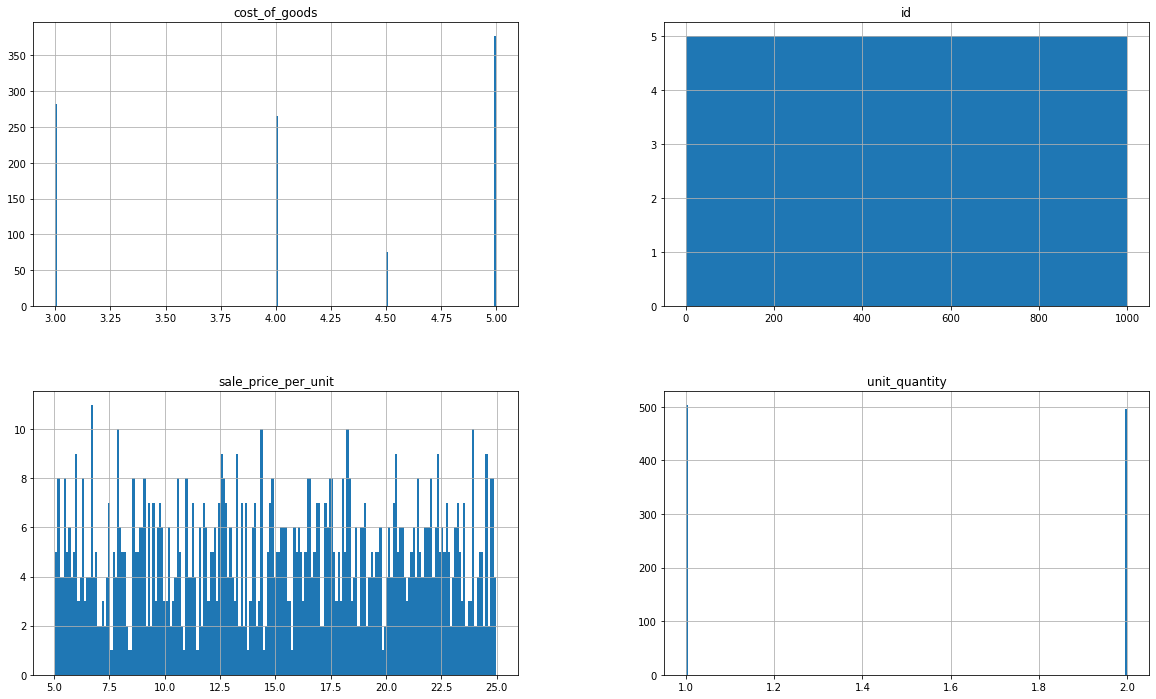

In [7]:
data.hist(figsize=(20,12), bins=200)
plt.show()

In [8]:
data.describe()

,id,unit_quantity,cost_of_goods,sale_price_per_unit
count,1000.00,1000.00,1000.00,1000.00
mean,500.50,1.50,4.13,15.17
std,288.82,0.50,0.81,5.77
min,1.00,1.00,3.00,5.05
25%,250.75,1.00,3.00,10.18
50%,500.50,1.00,4.00,15.32
75%,750.25,2.00,5.00,20.30
max,1000.00,2.00,5.00,24.99


In [9]:
data.describe(include = 'object')

,first_name,last_name,email,gender,Country,State,DVD_Title,Movie_Genre,Discount_Applied
count,1000,1000,1000,1000,1000,1000,1000,880,880
unique,948,988,1000,2,1,49,985,231,2
top,Conny,Wessing,rphelipik@statcounter.com,F,United States,California,"Fall of the Roman Empire, The",Drama,False
freq,5,2,1,503,1000,129,2,141,461


In [10]:
#first and last name add no value, ID will be used in lieu of both
#Dataset is related to the US so can remove country field

df = data[['id', 'gender', 'order_date', 'delivery_date', 'promise_date', 'State', 'unit_quantity', 'cost_of_goods', 'sale_price_per_unit', 'DVD_Title', 'Movie_Genre', 'Discount_Applied']].copy()

df.head()

,id,gender,order_date,delivery_date,promise_date,State,unit_quantity,cost_of_goods,sale_price_per_unit,DVD_Title,Movie_Genre,Discount_Applied
0,517,F,2018-01-01,2018-01-08,2018-01-07,Oklahoma,2,3.00,8.93,Sunny (Sseo-ni),Drama,False
1,219,F,2018-01-03,2018-01-07,2018-01-08,California,1,3.00,22.08,Air Crew,Action|Drama|Thriller,False
2,431,M,2018-01-03,2018-01-09,2018-01-09,Illinois,1,3.00,7.90,"Crazy Class Wakes Up, The (Hababam sinifi uyan...",Comedy,False
3,23,F,2018-01-04,2018-01-09,2018-01-09,Texas,2,3.00,6.43,"Buona Sera, Mrs. Campbell",Comedy,False
4,101,M,2018-01-05,2018-01-15,2018-01-15,Texas,2,3.00,16.97,Arnold,NaN,NaN


In [11]:
# Removing missing value in Movie_Genre and Discount column; which represent only 12% of the sample dataset
#
df_nonmissing = df.dropna(axis=0)
df_nonmissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   880 non-null    int64         
 1   gender               880 non-null    object        
 2   order_date           880 non-null    datetime64[ns]
 3   delivery_date        880 non-null    datetime64[ns]
 4   promise_date         880 non-null    datetime64[ns]
 5   State                880 non-null    object        
 6   unit_quantity        880 non-null    int64         
 7   cost_of_goods        880 non-null    float64       
 8   sale_price_per_unit  880 non-null    float64       
 9   DVD_Title            880 non-null    object        
 10  Movie_Genre          880 non-null    object        
 11  Discount_Applied     880 non-null    object        
dtypes: datetime64[ns](3), float64(2), int64(2), object(5)
memory usage: 72.2+ KB


In [12]:
df_nonmissing.describe()

,id,unit_quantity,cost_of_goods,sale_price_per_unit
count,880.00,880.00,880.00,880.00
mean,504.00,1.49,4.13,15.25
std,289.08,0.50,0.82,5.78
min,2.00,1.00,3.00,5.05
25%,254.75,1.00,3.00,10.36
50%,503.50,1.00,4.00,15.38
75%,758.25,2.00,5.00,20.31
max,999.00,2.00,5.00,24.99


In [13]:
df_nonmissing.describe(include='object')

,gender,State,DVD_Title,Movie_Genre,Discount_Applied
count,880,880,880,880,880
unique,2,48,866,231,2
top,F,California,Where Do We Go Now?,Drama,False
freq,445,113,2,141,461


In [14]:
# Computing the profit and ROI
# Profit = sale_price_per_unit - cost_of_goods
# ROI = sale_price_per_unit / cost_of_goods
df_nonmissing['Profit'] = df_nonmissing.sale_price_per_unit - df_nonmissing.cost_of_goods
df_nonmissing['ROI'] = df_nonmissing.sale_price_per_unit / df_nonmissing.cost_of_goods
df_nonmissing.head()

C:\Users\bushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\bushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,gender,order_date,delivery_date,promise_date,State,unit_quantity,cost_of_goods,sale_price_per_unit,DVD_Title,Movie_Genre,Discount_Applied,Profit,ROI
0,517,F,2018-01-01,2018-01-08,2018-01-07,Oklahoma,2,3.00,8.93,Sunny (Sseo-ni),Drama,False,5.93,2.98
1,219,F,2018-01-03,2018-01-07,2018-01-08,California,1,3.00,22.08,Air Crew,Action|Drama|Thriller,False,19.08,7.36
2,431,M,2018-01-03,2018-01-09,2018-01-09,Illinois,1,3.00,7.90,"Crazy Class Wakes Up, The (Hababam sinifi uyan...",Comedy,False,4.90,2.63
3,23,F,2018-01-04,2018-01-09,2018-01-09,Texas,2,3.00,6.43,"Buona Sera, Mrs. Campbell",Comedy,False,3.43,2.14
5,323,F,2018-01-05,2018-01-10,2018-01-11,Florida,2,3.00,15.92,"North and South, Book II",Drama|Romance|War,True,12.92,5.31


In [15]:
# Extracting years and months
df_nonmissing['Year'] = df_nonmissing['delivery_date'].dt.year
df_nonmissing['Month'] = df_nonmissing['delivery_date'].dt.month

df_nonmissing.head()

C:\Users\bushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,gender,order_date,delivery_date,promise_date,State,unit_quantity,cost_of_goods,sale_price_per_unit,DVD_Title,Movie_Genre,Discount_Applied,Profit,ROI,Year,Month
0,517,F,2018-01-01,2018-01-08,2018-01-07,Oklahoma,2,3.00,8.93,Sunny (Sseo-ni),Drama,False,5.93,2.98,2018,1
1,219,F,2018-01-03,2018-01-07,2018-01-08,California,1,3.00,22.08,Air Crew,Action|Drama|Thriller,False,19.08,7.36,2018,1
2,431,M,2018-01-03,2018-01-09,2018-01-09,Illinois,1,3.00,7.90,"Crazy Class Wakes Up, The (Hababam sinifi uyan...",Comedy,False,4.90,2.63,2018,1
3,23,F,2018-01-04,2018-01-09,2018-01-09,Texas,2,3.00,6.43,"Buona Sera, Mrs. Campbell",Comedy,False,3.43,2.14,2018,1
5,323,F,2018-01-05,2018-01-10,2018-01-11,Florida,2,3.00,15.92,"North and South, Book II",Drama|Romance|War,True,12.92,5.31,2018,1


In [16]:
df_nonmissing.info()
df_nonmissing.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   880 non-null    int64         
 1   gender               880 non-null    object        
 2   order_date           880 non-null    datetime64[ns]
 3   delivery_date        880 non-null    datetime64[ns]
 4   promise_date         880 non-null    datetime64[ns]
 5   State                880 non-null    object        
 6   unit_quantity        880 non-null    int64         
 7   cost_of_goods        880 non-null    float64       
 8   sale_price_per_unit  880 non-null    float64       
 9   DVD_Title            880 non-null    object        
 10  Movie_Genre          880 non-null    object        
 11  Discount_Applied     880 non-null    object        
 12  Profit               880 non-null    float64       
 13  ROI                  880 non-null  

,id,unit_quantity,cost_of_goods,sale_price_per_unit,Profit,ROI,Year,Month
count,880.00,880.00,880.00,880.00,880.00,880.00,880.00,880.00
mean,504.00,1.49,4.13,15.25,11.12,3.85,2019.10,6.40
std,289.08,0.50,0.82,5.78,5.83,1.70,0.93,3.59
min,2.00,1.00,3.00,5.05,0.05,1.01,2018.00,1.00
25%,254.75,1.00,3.00,10.36,6.02,2.47,2018.00,3.00
50%,503.50,1.00,4.00,15.38,11.29,3.79,2019.00,7.00
75%,758.25,2.00,5.00,20.31,16.21,4.82,2020.00,10.00
max,999.00,2.00,5.00,24.99,21.98,8.33,2021.00,12.00


In [63]:
df_nonmissing.corr()

,id,unit_quantity,cost_of_goods,sale_price_per_unit,Profit,ROI,Year,Month
id,1.00,-0.00,0.03,0.02,0.02,0.01,0.01,0.05
unit_quantity,-0.00,1.00,0.00,0.04,0.04,0.03,0.01,-0.05
cost_of_goods,0.03,0.00,1.00,0.01,-0.13,-0.48,0.92,0.02
sale_price_per_unit,0.02,0.04,0.01,1.00,0.99,0.85,0.02,-0.03
Profit,0.02,0.04,-0.13,0.99,1.00,0.91,-0.11,-0.03
ROI,0.01,0.03,-0.48,0.85,0.91,1.00,-0.42,-0.03
Year,0.01,0.01,0.92,0.02,-0.11,-0.42,1.00,-0.20
Month,0.05,-0.05,0.02,-0.03,-0.03,-0.03,-0.20,1.00


In [56]:
# Top 20 Profitable 
df_nonmissing = df_nonmissing.sort_values("Profit", ascending = False)
df_nonmissing.head(20)

,id,gender,order_date,delivery_date,promise_date,State,unit_quantity,cost_of_goods,sale_price_per_unit,DVD_Title,Movie_Genre,Discount_Applied,Profit,ROI,Year,Month
229,892,F,2018-09-26,2018-10-06,2018-10-06,Virginia,1,3.00,24.98,Desire Under the Elms,Drama|Romance,True,21.98,8.33,2018,10
212,280,F,2018-09-05,2018-09-12,2018-09-11,Arizona,2,3.00,24.96,India Song,Drama|Fantasy|Romance,False,21.96,8.32,2018,9
222,526,M,2018-09-19,2018-09-25,2018-09-23,Tennessee,2,3.00,24.83,Iron Eagle IV,Action|War,False,21.83,8.28,2018,9
217,861,M,2018-09-14,2018-09-19,2018-09-20,Kentucky,1,3.00,24.81,Abbott and Costello Meet Frankenstein,Comedy|Horror,True,21.81,8.27,2018,9
157,143,F,2018-07-19,2018-07-23,2018-07-22,Colorado,2,3.00,24.76,Hannah Montana: The Movie,Comedy|Drama|Musical|Romance,False,21.76,8.25,2018,7
196,71,M,2018-08-19,2018-08-28,2018-08-27,California,2,3.00,24.73,Swamp Water,Drama,False,21.73,8.24,2018,8
243,294,M,2018-10-14,2018-10-20,2018-10-18,District of Columbia,1,3.00,24.70,Djomeh,Drama,False,21.70,8.23,2018,10
106,355,F,2018-05-03,2018-05-11,2018-05-13,North Carolina,1,3.00,24.65,"Rise of Catherine the Great, The",Drama,False,21.65,8.22,2018,5
79,273,F,2018-03-30,2018-04-03,2018-04-01,Virginia,1,3.00,24.62,Rebirth of Mothra II,Action|Fantasy,True,21.62,8.21,2018,4
55,419,F,2018-03-08,2018-03-14,2018-03-16,Oregon,2,3.00,24.45,?Ä nous la libert?© (Freedom for Us),Comedy|Musical,True,21.45,8.15,2018,3


In [60]:
agg = df_nonmissing.groupby("gender")["Profit"].mean()
agg

gender
F   11.26
M   10.97
Name: Profit, dtype: float64

In [61]:
agg = df_nonmissing.groupby(["gender", "Discount_Applied"])["Profit"].mean()
agg

gender  Discount_Applied
F       False              11.11
        True               11.44
M       False              10.96
        True               10.98
Name: Profit, dtype: float64

In [62]:
agg = df_nonmissing.groupby(["gender", "Discount_Applied", "Movie_Genre"])["Profit"].mean()
print(agg)

gender  Discount_Applied  Movie_Genre                                     
F       False             Action                                             12.69
                          Action|Adventure                                   11.14
                          Action|Adventure|Comedy                             9.20
                          Action|Adventure|Comedy|Musical|Romance|Thriller   16.76
                          Action|Adventure|Fantasy|Sci-Fi                    11.01
                                                                              ... 
M       True              Romance|Western                                     9.30
                          Sci-Fi                                             12.94
                          Sci-Fi|Thriller                                     6.22
                          Thriller                                            9.55
                          Western                                            10.73
Name: Profit

In [42]:
agg = df_nonmissing.groupby(["gender", "State"])["Profit"].mean()
agg

gender  State        
F       Alabama         14.88
        Alaska          14.56
        Arizona         12.75
        Arkansas         3.00
        California      11.07
                         ... 
M       Vermont         11.60
        Virginia        10.48
        Washington      10.94
        West Virginia    8.68
        Wisconsin       14.42
Name: Profit, Length: 90, dtype: float64

In [44]:
agg = df_nonmissing.groupby(["gender", "Year"])["Profit"].mean()
agg

gender  Year
F       2018   12.77
        2019   10.83
        2020    9.97
        2021   11.28
M       2018   11.34
        2019   11.02
        2020   10.63
        2021   10.45
Name: Profit, dtype: float64

In [47]:
agg = df_nonmissing.pivot_table(values = "Profit", index = "gender", columns = ["Year"], margins = True)
agg

Year,2018,2019,2020,2021,All
gender,,,,,
F,12.77,10.83,9.97,11.28,11.26
M,11.34,11.02,10.63,10.45,10.97
All,12.09,10.93,10.32,10.94,11.12


In [48]:
agg = df_nonmissing.pivot_table(values = "Profit", index = "State", columns = ["Year"], margins = True)
agg

Year,2018,2019,2020,2021,All
State,,,,,
Alabama,19.81,16.41,13.23,nan,15.85
Alaska,12.70,nan,18.27,nan,14.56
Arizona,14.40,11.41,8.50,9.93,11.69
Arkansas,nan,12.84,2.02,nan,7.43
California,12.15,10.22,9.73,15.42,11.04
Colorado,13.96,11.49,14.19,nan,13.89
Connecticut,8.52,4.72,8.60,18.26,8.39
Delaware,7.18,nan,nan,nan,7.18
District of Columbia,11.92,15.29,9.07,10.42,11.78


In [49]:
agg = df_nonmissing.groupby(["gender"])["sale_price_per_unit"].mean()
agg

gender
F   15.38
M   15.12
Name: sale_price_per_unit, dtype: float64

In [50]:
agg = df_nonmissing.groupby(["gender", "Year"])["sale_price_per_unit"].mean()
agg

gender  Year
F       2018   15.88
        2019   15.00
        2020   14.97
        2021   16.28
M       2018   14.44
        2019   15.20
        2020   15.63
        2021   15.45
Name: sale_price_per_unit, dtype: float64

In [52]:
agg = df_nonmissing.groupby(["gender", "Year"])["sale_price_per_unit"].agg([min, max])
agg

min   max
gender Year           
F      2018 5.21 24.98
       2019 5.18 24.99
       2020 5.10 24.73
       2021 5.05 24.85
M      2018 5.07 24.83
       2019 5.08 24.83
       2020 5.30 24.83
       2021 5.55 24.71

## Plotting the Data

In [17]:
import seaborn as sns

In [29]:
# Creating new dataframe
df_1 = df_nonmissing[['delivery_date', 'Profit', 'ROI', 'Year', 'Month']]
df_1.info()

# Display
df_1.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   delivery_date  880 non-null    datetime64[ns]
 1   Profit         880 non-null    float64       
 2   ROI            880 non-null    float64       
 3   Year           880 non-null    int64         
 4   Month          880 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 41.2 KB


,delivery_date,Profit,ROI,Year,Month
0,2018-01-08,5.93,2.98,2018,1
1,2018-01-07,19.08,7.36,2018,1
2,2018-01-09,4.90,2.63,2018,1
3,2018-01-09,3.43,2.14,2018,1
5,2018-01-10,12.92,5.31,2018,1


In [ ]:
df_1.Profit.plot(figsize=(20,2), title = "Profit")

plt.show()

In [37]:
df_1.corr()

,Profit,ROI,Year,Month
Profit,1.00,0.91,-0.11,-0.03
ROI,0.91,1.00,-0.42,-0.03
Year,-0.11,-0.42,1.00,-0.20
Month,-0.03,-0.03,-0.20,1.00


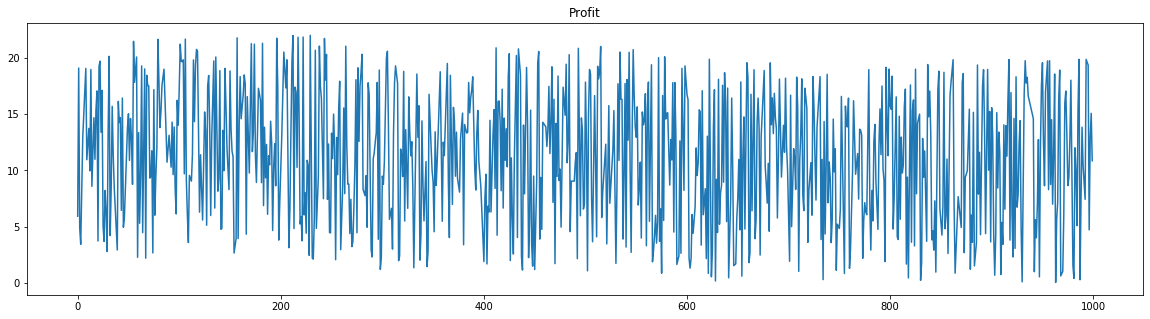

In [38]:

df_1.Profit.plot(figsize=(20,5), title = "Profit")

plt.show()

In [20]:
# Setting delivery date as index
#df_1 = df_1.set_index("delivery_date", inplace = True)

#df_1.info()
# Display
#df_1.head()

AttributeError: 'NoneType' object has no attribute 'info'

NameError: name 'months' is not defined

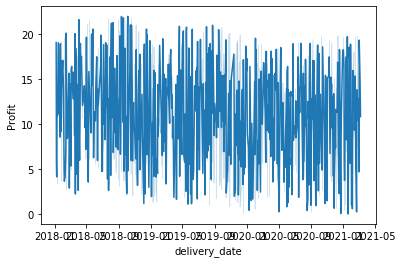

In [34]:
# Line chart 
sns.lineplot(df_1.delivery_date, df_1.Profit)
plt.xticks(months)
#plt.show()

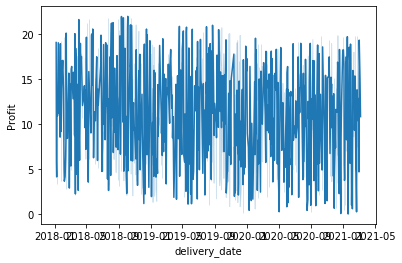

In [36]:
# Line chart 
sns.lineplot(x = 'delivery_date', y = 'Profit', data = df_1)
plt.show()

In [ ]:
# Line chart showing daily global streams of each song 
sns.lineplot(data=df_1)

In [ ]:
df_1.Profit.plot(figsize=(20,2), title = "Profit")
#df_nonmissing_1.Profit.plot(figsize=(20,5), title = "Profit")
plt.show()

In [ ]:
df_nonmissing.head()

In [ ]:
# movie with highest profit
df_nonmissing[df_nonmissing.Profit == df_nonmissing.Profit.max()]

In [ ]:
# movie with lowest profit
df_nonmissing[df_nonmissing.Profit == df_nonmissing.Profit.min()]

In [ ]:
# movie with highest ROI
df_nonmissing[df_nonmissing.ROI == df_nonmissing.ROI.max()]

In [ ]:
# movie with lowest ROI
df_nonmissing[df_nonmissing.ROI == df_nonmissing.ROI.min()]